# Hotel Bookings Exploratory Data Analysis


## Objective
We are provided with a hotel bookings dataset. 
Our main objective is perform EDA on the given dataset and draw useful conclusions about general trends
in hotel bookings and how factors governing hotel bookings interact with each other.

## Dataset
We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

```
- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for 
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.
```

- Total number of rows in data: 119390
- Total number of columns: 32

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\amit singh\\Python_Analytics\\Python Porject\\.ipynb_checkpoints\\Hotel dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amit singh\\Python_Analytics\\Python Porject\\.ipynb_checkpoints\\Hotel dataset.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Create the Copy of dataframe
df1 = df.copy()

In [ ]:
df1

In [ ]:
df1.hotel.value_counts()

In [ ]:
df1.is_canceled.value_counts(dropna=False)


In [ ]:
df1.arrival_date_year.value_counts(dropna = False)

In [ ]:
df1.meal.value_counts(dropna = False)

In [ ]:
df1.market_segment.value_counts(dropna = False)

In [ ]:
df1.distribution_channel.value_counts(dropna=False)

In [ ]:
df1.children.value_counts(dropna = False)

### <b> Cleaning data </b> 

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 
1) Remove duplicate rows  
2) Handling missing values.  
3) Convert columns to appropriate datatypes.  
4) Adding important columns

### 1) Remove duplicate rows

In [ ]:
df1[df1.duplicated()].shape

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

### 2) Handling missing values.

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:4]

Since, company and agent columns have null values.
There may be some cases in which the customer didnt booked hotel through any agent or company.So, 
null values can be kept and will be replaced by 0.

In [ ]:
df1.agent.fillna(0, inplace = True)

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:4]

In [ ]:
df1.children.value_counts(dropna = False)

Nan values can be replaced with 0 values as 0 column is present .
So customer might have forgetten to fill the column

In [ ]:
df1.children.fillna(0,inplace = True)

In [ ]:
df1.children.value_counts(dropna = False)

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:4]

In [ ]:
df1.country.value_counts()

In [ ]:
df1.country.fillna("others", inplace = True)

In [ ]:
df1.country.value_counts()

In [ ]:
df1.isnull().sum().sort_values(ascending = False)

In [ ]:
df1[df1.adults + df1.babies + df1.children == 0].shape

There are some rows where total number of adults,children and babies is zero. So, we will remove such rows.

In [ ]:
df1.drop(df1[df1.adults + df1.babies + df1.children == 0].index, inplace = True)

In [ ]:
df1.shape

In [ ]:
df1.dtypes

### 3.Converting columns to appropriate data types

In [ ]:
df1.info()

Converting datatype of columns 'children', 'company' and 'agent' from float to int.


In [ ]:
# Fill NaN values with a specific value (e.g., 0)
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].fillna(0).astype(int)
# Drop rows with NaN values in the specified columns
df1 = df1.dropna(subset=['children', 'company', 'agent']).astype({'children': int, 'company': int, 'agent': int})

In [ ]:
df1.info()

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format='%m/%d/%Y')

In [ ]:
df1.reservation_status_date

### 4. Adding important columns

In [ ]:
df1.info()

In [ ]:
df1.stays_in_week_nights

In [ ]:
df1.stays_in_weekend_nights

In [ ]:
df1["total_stay"] = df1.stays_in_week_nights

In [ ]:
df1.total_stay

In [ ]:
df1.head()

In [3]:
df1["total_people"] = df1.adults + df1.babies + df1.children

NameError: name 'df1' is not defined

In [4]:
df1.total_people

NameError: name 'df1' is not defined

In [5]:
df1.head()

NameError: name 'df1' is not defined

## 5.Exploratory Data Analysis

In [6]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

NameError: name 'df1' is not defined

In [7]:
num_df1.corr()

NameError: name 'num_df1' is not defined

In [8]:
plt.figure(figsize = (12,7), dpi = 200)
sns.heatmap(num_df1.corr(), annot = True)

NameError: name 'num_df1' is not defined

<Figure size 2400x1400 with 0 Axes>

There is a slight relation between total_people and adr(average daily rate)
. This makes sense as mor no. of people means more revenue

In [9]:
plt.figure(figsize=(12,6),dpi =200)
sns.scatterplot(x = df1.total_stay, y  = df1.adr)

NameError: name 'df1' is not defined

<Figure size 2400x1200 with 0 Axes>

Here we can see that there is an outlier. We have to remove it

In [10]:
df1[df1.adr > 5000]

NameError: name 'df1' is not defined

In [11]:
df1.drop(df1[df1.adr > 5000].index, inplace= True)

NameError: name 'df1' is not defined

In [12]:
df1[df1.adr > 5000]

NameError: name 'df1' is not defined

In [13]:
plt.figure(figsize=(12,6),dpi =200)
sns.scatterplot(x = df1.total_stay, y  = df1.adr)

NameError: name 'df1' is not defined

<Figure size 2400x1200 with 0 Axes>

From the scatter plot we can see that as length of tottal_stay increases the adr decreases.
This means for longer stay, the better deal for customer can be finalised.

# Q1 Most no. of bookings by agent

In [14]:
df1.head()

NameError: name 'df1' is not defined

In [15]:
top_agent = df1.agent.value_counts().sort_values(ascending = False)

NameError: name 'df1' is not defined

In [16]:
top_agent[:10]

NameError: name 'top_agent' is not defined

In [17]:
plt.figure(figsize = (10,6), dpi =100)
sns.barplot(x = top_agent[:10].index, y = top_agent[:10])

NameError: name 'top_agent' is not defined

<Figure size 1000x600 with 0 Axes>

#    Q2 - Which room type is in most demand and which room type generates the  highest adr?

In [18]:
top_room = df1.assigned_room_type.value_counts()

NameError: name 'df1' is not defined

In [60]:
top_room

assigned_room_type
A    46282
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: count, dtype: int64

<Axes: xlabel='assigned_room_type', ylabel='count'>

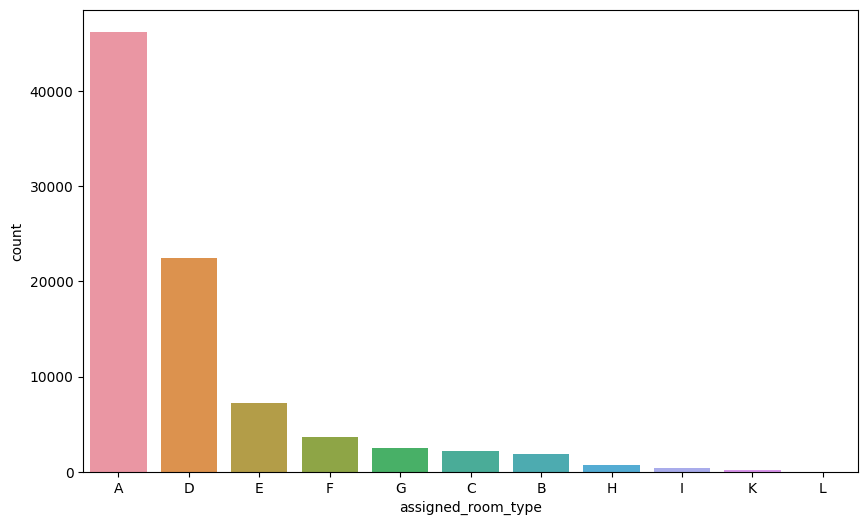

In [61]:
plt.figure(figsize = (10,6), dpi =100)
sns.barplot(x = top_room.index, y = top_room)

# Q3 - Which room type generate the highest adr

<Axes: xlabel='assigned_room_type', ylabel='adr'>

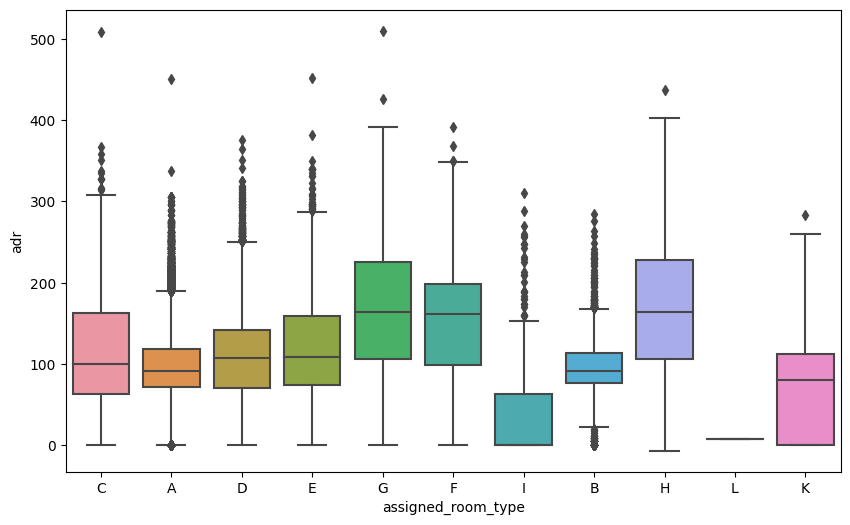

In [62]:
plt.figure(figsize = (10,6), dpi =100)
sns.boxplot(x = df1.assigned_room_type, y = df1.adr)

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

# Q4) Which meal type is the  most prefered meal of customers?

In [63]:
meal = df1.meal.value_counts()

<Axes: xlabel='meal', ylabel='count'>

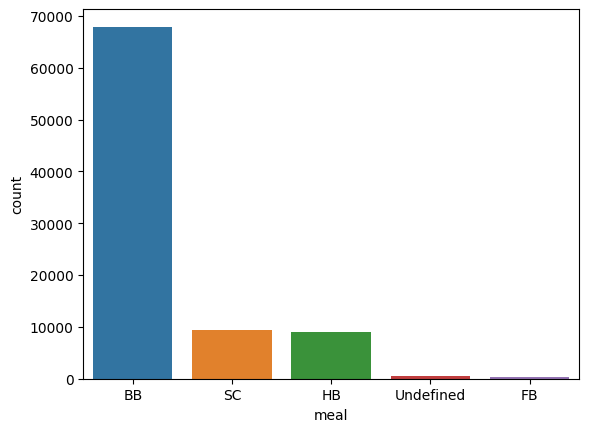

In [64]:
sns.barplot(x = meal.index, y = meal)

Most preferred meal type is BB (Bed and breakfast).

# Q5) What is the  percentage of bookings in each hotel?


In [65]:
perc_bookings = df1.hotel.value_counts()/ len(df1)* 100

<Axes: xlabel='hotel', ylabel='count'>

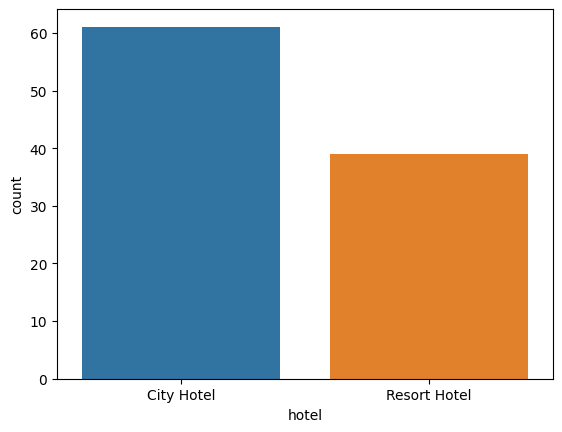

In [66]:
sns.barplot(x = perc_bookings.index, y = perc_bookings)

# Q6) Which is the most common channel for booking hotels?

In [67]:
top_channel = df1.distribution_channel.value_counts()
top_channel

distribution_channel
TA/TO        69027
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: count, dtype: int64

<Axes: xlabel='distribution_channel', ylabel='count'>

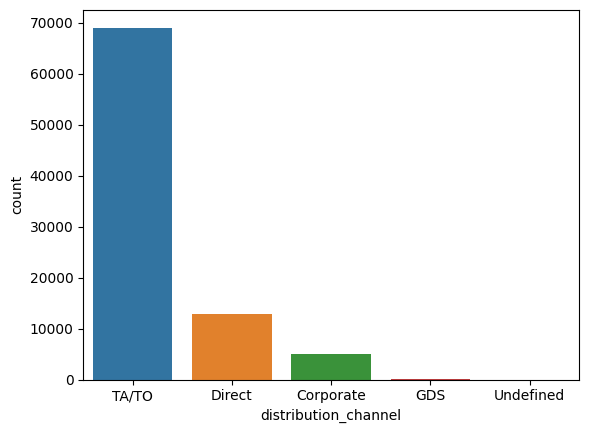

In [68]:
sns.barplot(x = top_channel.index,y = top_channel)

# Q7) Which are the most busy months?

In [69]:
busy_month = df1.arrival_date_month.value_counts()

In [70]:
busy_month

arrival_date_month
August       11242
July         10043
May           8344
April         7900
June          7756
March         7488
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: count, dtype: int64

<Axes: xlabel='arrival_date_month', ylabel='count'>

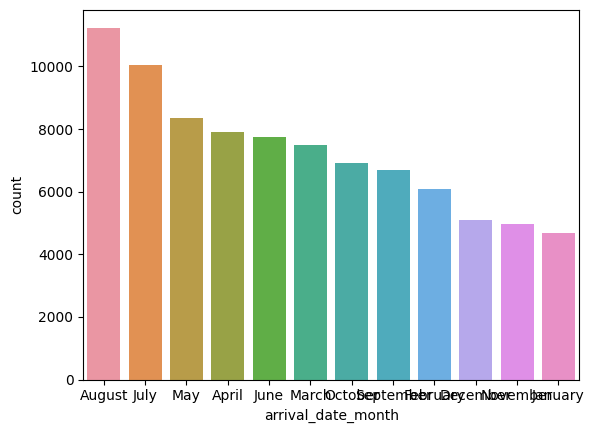

In [71]:
sns.barplot(x = busy_month.index, y = busy_month)

# Q8) From which country most of the guests are coming ?

In [72]:
top_country = df1.country.value_counts()[:10]

In [73]:
top_country

country
PRT    27354
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

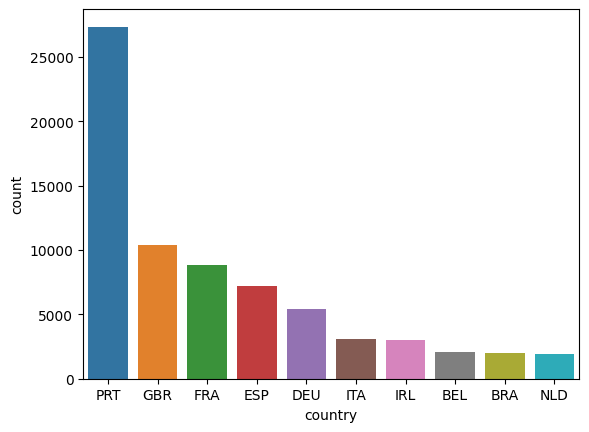

In [74]:
sns.barplot(x = top_country.index, y = top_country)

# Q9) How long do people stay at the hotels?

In [75]:
stay = df1.total_stay.value_counts()[:10]

In [76]:
stay

total_stay
1     22172
2     20730
3     16242
5      9654
4      7857
0      6112
6      1375
10      966
7       962
8       611
Name: count, dtype: int64

<Axes: xlabel='total_stay', ylabel='count'>

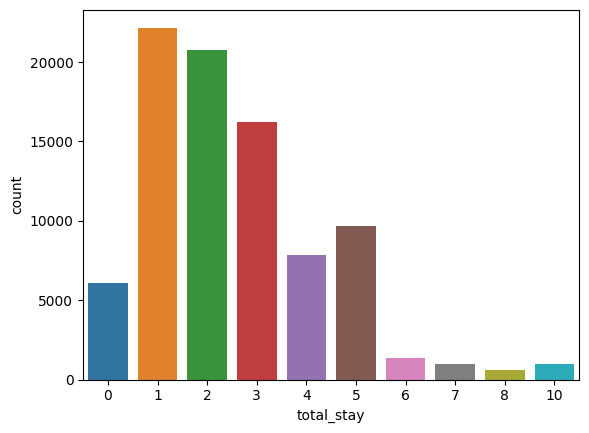

In [77]:
sns.barplot(x = stay.index, y = stay)

# Q10)  Which hotel has a  higher lead time?

In [78]:
# Assuming df1 is your DataFrame
df1['lead_time'] = pd.to_numeric(df1['lead_time'], errors='coerce')
# Filter out non-numeric values
numeric_leadtime = df1[pd.notna(df1['lead_time'])]
# Calculate median lead_time for each hotel
median_leadtime = numeric_leadtime.groupby("hotel")["lead_time"].median()

<Axes: xlabel='hotel', ylabel='lead_time'>

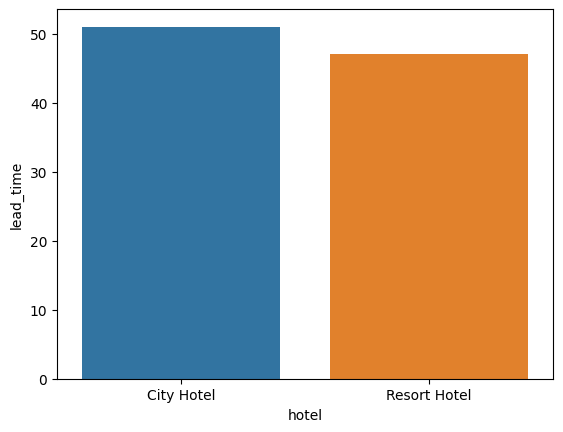

In [79]:
sns.barplot(x = median_leadtime.index, y = median_leadtime)

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, 
this means customers generally plan their hotel visits way to early.

# Q11)  What is preferred stay length in each hotel?

In [83]:
not_cancelled = df1[df1.is_canceled == 0]

In [86]:
s1 = not_cancelled[not_cancelled.total_stay < 15]

<Axes: xlabel='total_stay', ylabel='count'>

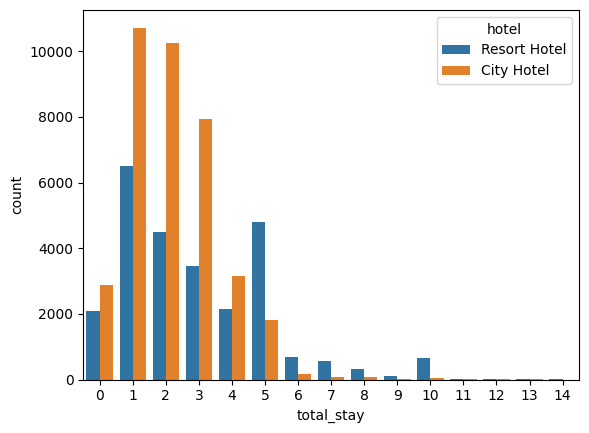

In [89]:
sns.countplot(x = s1.total_stay, hue = s1.hotel)

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# Q12)  Which hotel has higher bookings cancellation rate.

In [97]:
cancelled = df1[df1.is_canceled == 1]

canceled_bookings = cancelled.groupby("hotel").count().is_canceled

total_bookings = df1.groupby("hotel").count().is_canceled

cancel_perc = canceled_bookings/total_bookings * 100

D3 = pd.concat([canceled_bookings,total_bookings,cancel_perc],axis =1)

D3.columns = ["canceled_bookings","total_bookings","cancel_perc"]


In [98]:
D3

,canceled_bookings,total_bookings,cancel_perc
hotel,,,
City Hotel,16034,53273,30.097798
Resort Hotel,7974,33956,23.483331


<Axes: xlabel='hotel', ylabel='cancel_perc'>

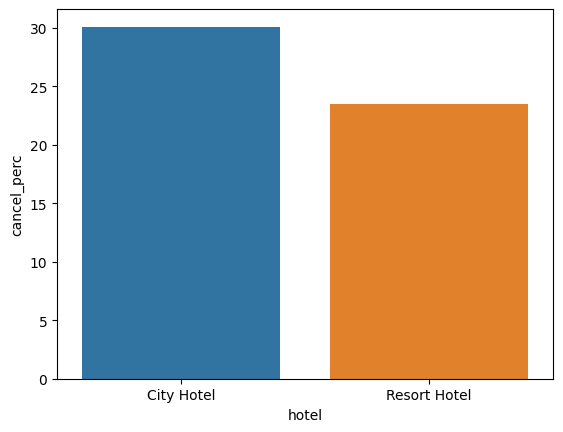

In [102]:
sns.barplot(x = D3.index, y = D3.cancel_perc)

# Q13)  Which hotel has a  high chance that its customer will return for another stay?

In [103]:
repeated_guest = df1[df1.is_repeated_guest == 1]

In [105]:
repeated_guests = repeated_guest.groupby("hotel").count().is_repeated_guest

In [106]:
repeated_guests

hotel
City Hotel      1657
Resort Hotel    1707
Name: is_repeated_guest, dtype: int64

In [108]:
total_guests = df1.groupby("hotel").count().is_repeated_guest

In [111]:
perc_repetation = repeated_guests/total_guests * 100

In [112]:
perc_repetation

hotel
City Hotel      3.110394
Resort Hotel    5.027094
Name: is_repeated_guest, dtype: float64

<Axes: xlabel='hotel', ylabel='perc_repetation'>

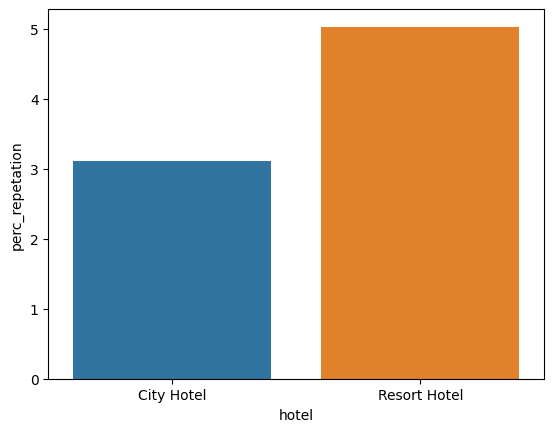

In [115]:
D4 = pd.concat([repeated_guests,total_guests,perc_repetation], axis =1)
D4.columns = ["repeated_guests","total_guests", "perc_repetation"]
sns.barplot(x = D4.index,y = D4.perc_repetation)

# Q14)  Which distribution channel is mostly used for the  early booking of hotels?

In [118]:
channel = df1.distribution_channel.value_counts()/len(df1) * 100
channel

distribution_channel
TA/TO        79.133086
Direct       14.850566
Corporate     5.803116
GDS           0.207500
Undefined     0.005732
Name: count, dtype: float64

<Axes: xlabel='distribution_channel', ylabel='count'>

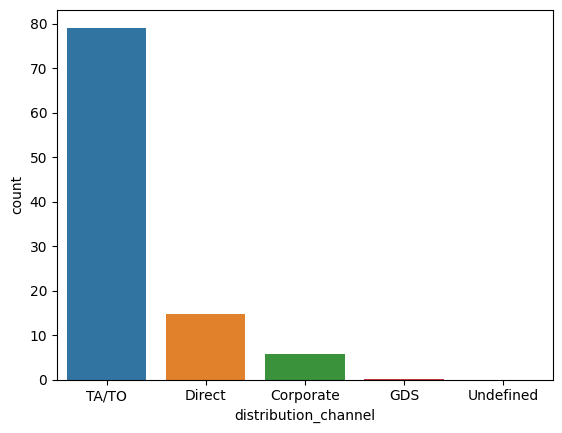

In [120]:
sns.barplot(x = channel.index,y = channel)

# Q16)  Which distribution channel brings better revenue-generatingg deals for hotels?

In [124]:
revenue = df1.groupby(["distribution_channel", "hotel"])["adr"].mean()
# Creating a new DataFrame with the result
D6 = pd.DataFrame(revenue).reset_index()
# Displaying the resulting DataFrame
print(D6)

  distribution_channel         hotel         adr
0            Corporate    City Hotel   83.777368
1            Corporate  Resort Hotel   53.036835
2               Direct    City Hotel  112.606688
3               Direct  Resort Hotel  106.566215
4                  GDS    City Hotel  120.317845
5                TA/TO    City Hotel  112.544578
6                TA/TO  Resort Hotel  101.578317
7            Undefined    City Hotel   29.625000
8            Undefined  Resort Hotel  112.700000


<Axes: xlabel='distribution_channel', ylabel='adr'>

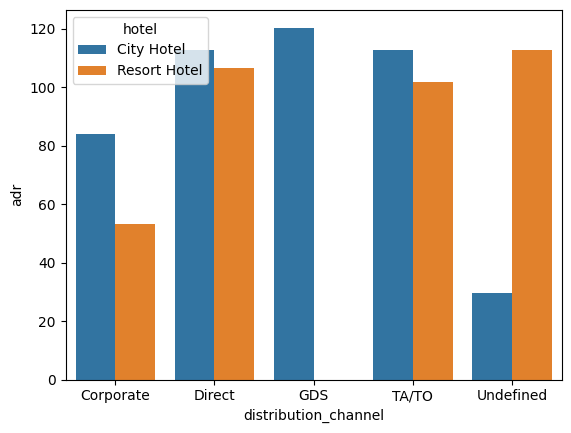

In [125]:
sns.barplot(x = D6.distribution_channel,y = D6.adr, hue = D6.hotel)

# Q17)  Which channel has a  longer average waiting time?

In [126]:
avg_wait_time = df1.groupby("distribution_channel").days_in_waiting_list.mean()
avg_wait_time

distribution_channel
Corporate    0.196168
Direct       0.368766
GDS          0.000000
TA/TO        0.859504
Undefined    0.000000
Name: days_in_waiting_list, dtype: float64

<Axes: xlabel='distribution_channel', ylabel='days_in_waiting_list'>

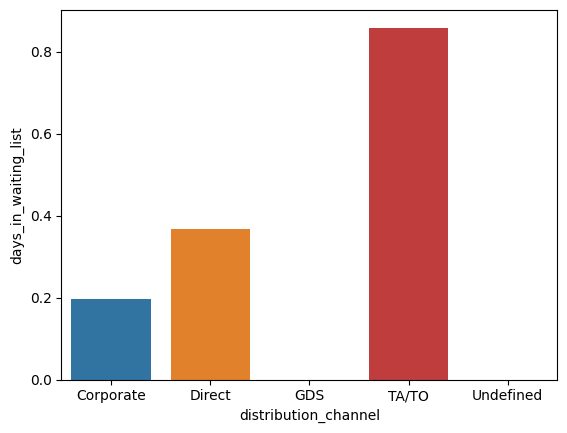

In [128]:
sns.barplot(x = avg_wait_time.index,y = avg_wait_time)

# Q18)  Which significant distribution channel has the highest cancellation percentage?

In [129]:
is_cancelled = df1[df1.is_canceled == 1]

num_cancellation = is_cancelled.groupby("distribution_channel").count().is_canceled

total_bookings = df1.groupby("distribution_channel").count().is_canceled

perc_cancellation = num_cancellation/total_bookings * 100

perc_cancellation

distribution_channel
Corporate    12.761754
Direct       14.844836
GDS          19.889503
TA/TO        31.000913
Undefined    80.000000
Name: is_canceled, dtype: float64

<Axes: xlabel='distribution_channel', ylabel='is_canceled'>

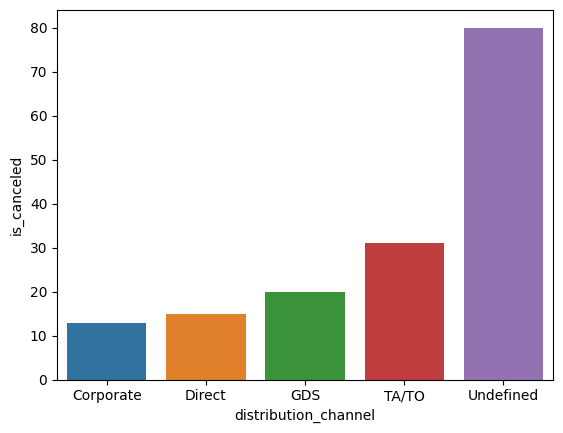

In [131]:
sns.barplot(x = perc_cancellation.index,y = perc_cancellation)

# Q19) Does a  longer waiting period or longer lead time causes the cancellation of bookings?

In [132]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]

In [133]:
waiting_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
2272,Resort Hotel,0,59,2015,October,41,8,0,3,2,...,0,50,Contract,45.0,0,0,Check-Out,2015-10-11,3,2
2486,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,4,2
2508,Resort Hotel,0,47,2015,October,43,19,1,4,2,...,0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,4,2
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,0,65,Transient-Party,69.0,0,0,Check-Out,2015-11-24,4,2
3118,Resort Hotel,0,105,2015,November,47,18,2,4,2,...,0,65,Transient-Party,71.0,0,0,Check-Out,2015-11-24,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111978,City Hotel,0,345,2017,May,19,13,2,3,2,...,0,36,Transient-Party,89.1,0,0,Check-Out,2017-05-18,3,2
112021,City Hotel,0,34,2017,May,20,16,0,3,1,...,0,9,Transient-Party,130.0,0,0,Check-Out,2017-05-19,3,1
112822,City Hotel,0,344,2017,May,21,27,1,1,2,...,0,98,Transient-Party,128.0,0,1,Check-Out,2017-05-29,1,2
114733,City Hotel,0,322,2017,June,25,23,2,2,2,...,0,59,Transient-Party,105.0,0,3,Check-Out,2017-06-27,2,2


<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

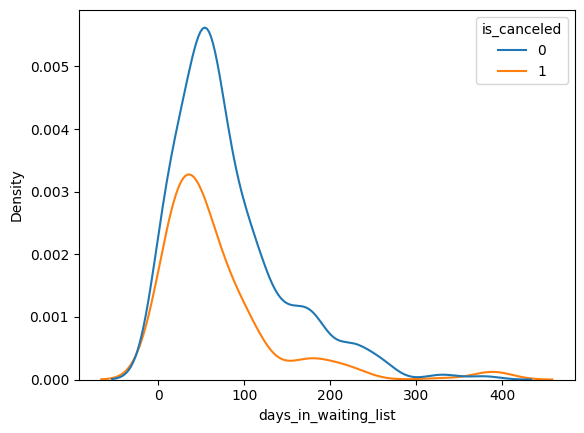

In [135]:
sns.kdeplot(x = "days_in_waiting_list",hue = "is_canceled", data = waiting_bookings)

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings


<Axes: xlabel='lead_time', ylabel='Density'>

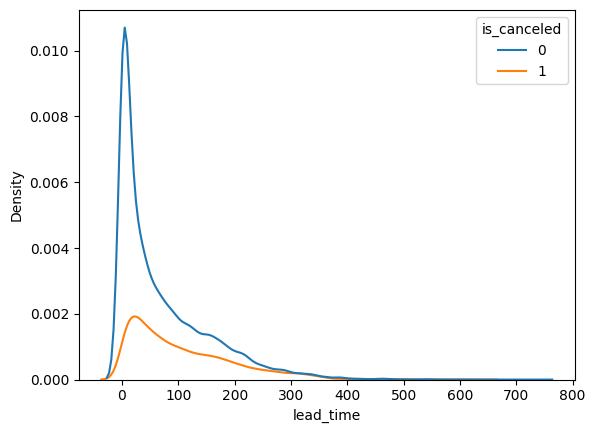

In [136]:
sns.kdeplot(x = "lead_time",hue = "is_canceled", data = df1)

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

# Q20) Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?

In [137]:
# rooms cancelled if reserved != assigned ---> True
# rooms cancelled if reserved = assigned -----> False

cancellations = df1[df1.is_canceled == 1]

count = 0
count1 = 0

cancellations["same_room_not_alloted"] = cancellations['reserved_room_type'] != cancellations['assigned_room_type']
    
cancellations["same_room_not_alloted"].value_counts()/len(cancellations) * 100

same_room_not_alloted
False    97.434189
True      2.565811
Name: count, dtype: float64

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demande

# Q21) Does not alloting the  same room as demanded affect adr?

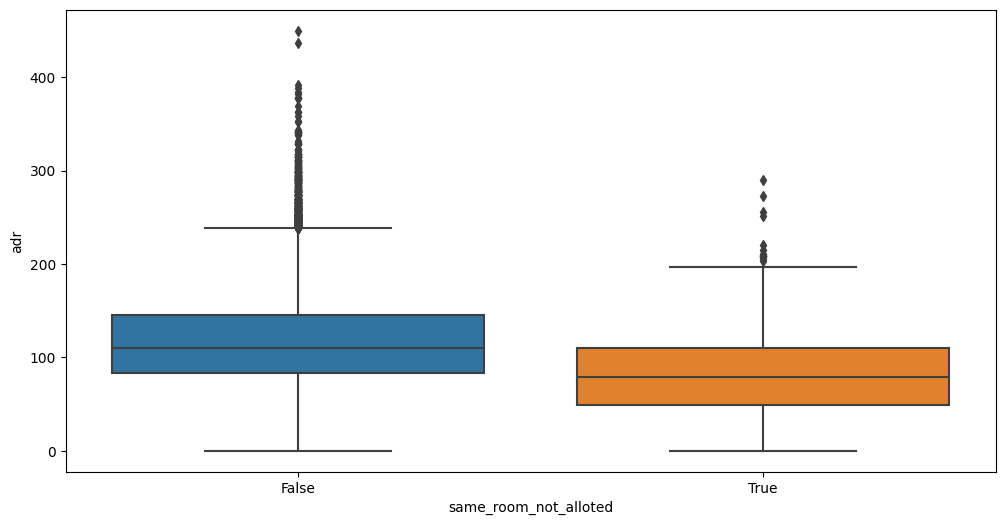

In [139]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = cancellations)
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

# Q22) Which types of customers mostly make bookings?

In [140]:
not_canceled  = df1[df1.is_canceled == 0]
not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,5,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,5,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,5,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,5,2


In [141]:
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

In [142]:
len(single)

12974

In [143]:
len(couple)

40624

In [144]:
len(family)

9286